https://towardsdatascience.com/shortest-paths-and-dijkstras-algorithm-68c9ec30eff0

In [2]:
from queue import PriorityQueue
import pandas as pd
import heapq as hq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from collections import OrderedDict
from common.utility import Node
from common.utility import dijkstra

In [3]:
FILEPATH = f'../../data/processed'
wantedStartNode = 197831

In [4]:
nodesAndPositions = OrderedDict()

with open(f'{FILEPATH}/nodesAndPositions.txt', 'r') as nodes:
    for line in nodes:
        list = [float(i) for i in line.split(sep=",")]
        # coords.append(list[1:])
        # nodeIDs.append(list[0])'
        
        nodesAndPositions[list[0]] = [list[2], list[1]]

In [5]:
myNodes = {}

with open(f'{FILEPATH}/nodesInHighwaysSorted.txt', 'r') as nodes:
    for ID in nodes:
        ID = int(ID)
        myNodes[ID] = Node(ID)
    

In [6]:
with open(f'{FILEPATH}/edgesSorted.txt', 'r') as edges:   
    for line in edges:
        data = [i for i in line.split(sep=",")]
        fromID, toID, distance = data        
        fromID = int(fromID)
        toID = int(toID)
        distance = float(distance)
        
        # Get Objects
        fromNode = myNodes[fromID]
        toNode =  myNodes[toID]
    
        Node.add_edge(fromNode, toNode, distance)

In [7]:
dijkstra(myNodes[wantedStartNode])
distances = [myNodes[ID].distance for ID in nodesAndPositions.keys()]
coords = nodesAndPositions.values()
wantedStartNodeCoords = nodesAndPositions[wantedStartNode]


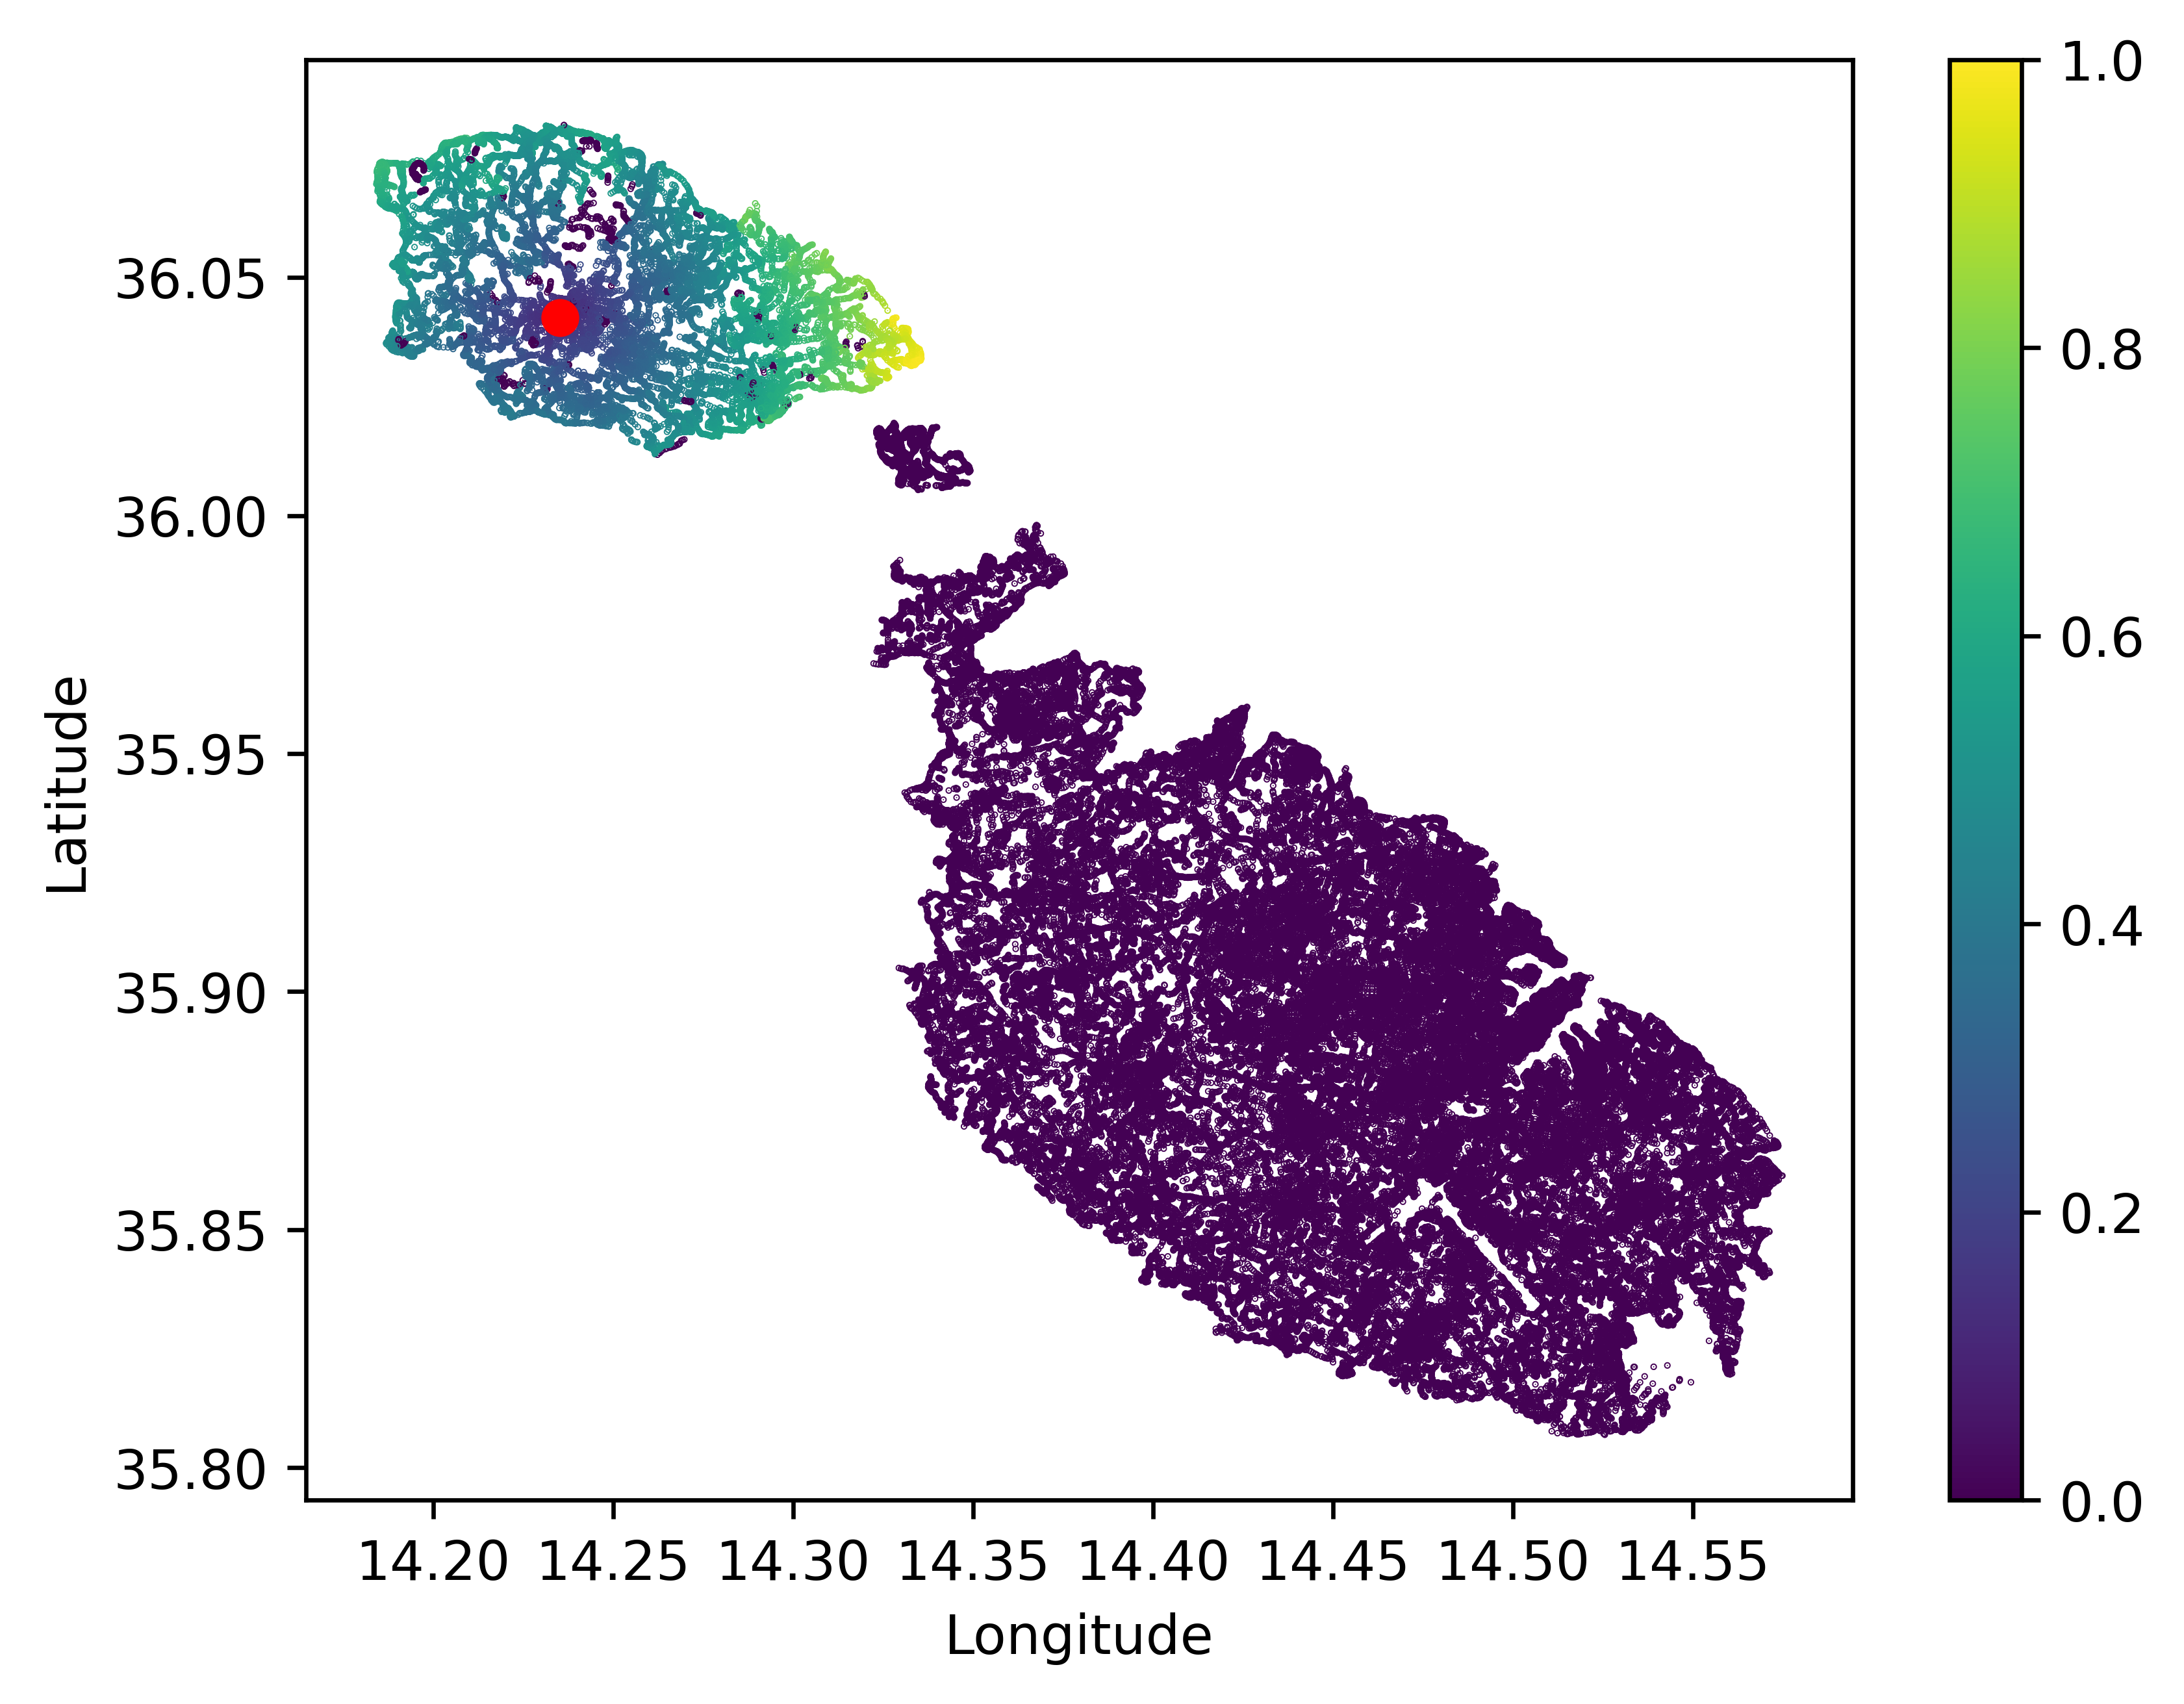

In [8]:
plt.rcParams['figure.dpi'] = 600
plt.scatter(*zip(*coords), s = 0.05, c = distances)
plt.scatter(wantedStartNodeCoords[0], wantedStartNodeCoords[1], c = 'red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()